# Aula 1 - Modulo 1 - Animando lábio em imagem

In [1]:
#@title
%tensorflow_version 1.x
import os
from os.path import exists, join, basename, splitext
 
git_repo_url = 'https://github.com/Rudrabha/LipGAN.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  !git clone -q --depth 1 -b fully_pythonic {git_repo_url}
  !pip install -q gdown youtube-dl
  !pip install -q git+https://www.github.com/keras-team/keras-contrib.git
 
import sys
sys.path.append(project_name)
import matplotlib.pyplot as plt
from IPython.display import Audio

TensorFlow 1.x selected.
     |████████████████████████████████| 1.8MB 22.2MB/s 


In [2]:
pretrained_checkpoint = 'LipGAN/logs/lipgan_residual_mel.h5'
if not exists(pretrained_checkpoint):
  !cd LipGAN/logs && gdown https://drive.google.com/uc?id=1DtXY5Ei_V6QjrLwfe7YDrmbSCDu6iru1
  !cd LipGAN/logs && wget -q http://dlib.net/files/mmod_human_face_detector.dat.bz2
  !cd LipGAN/logs && bzip2 -d mmod_human_face_detector.dat.bz2
  !ls LipGAN/logs

Downloading...
From: https://drive.google.com/uc?id=1DtXY5Ei_V6QjrLwfe7YDrmbSCDu6iru1
To: /content/LipGAN/logs/lipgan_residual_mel.h5
199MB [00:02, 87.5MB/s]
gen_faces  lipgan_residual_mel.h5  mmod_human_face_detector.dat  README.md


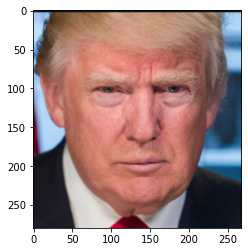

In [3]:

image_name = '/content/trump.png'
audio_name = '/content/trump.mp3'
plt.imshow(plt.imread(image_name))

In [4]:
!rm -rf *.avi
!cd {project_name} && python batch_inference.py --checkpoint_path logs/lipgan_residual_mel.h5 --face {image_name} --fps 30 --audio {audio_name} --results_dir ..

Using TensorFlow backend.
(80, 797)
Length of mel chunks: 290
  0% 0/2 [00:00<?, ?it/s]
  0% 0/1 [00:00<?, ?it/s]
100% 1/1 [00:04<00:00,  4.82s/it]
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-11-15 02:20:49.483740: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-11-15 02:20:49.484135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-15 02:20:49.484729: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-11-15 02:20:49.485072: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-11-15 02:20:49.485153: I tensorflow/stream_executor/platfo

In [5]:
#@title
!ffmpeg -y -loglevel panic -i result_voice.avi output.mp4

def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)